#####  Label 0~9 이미지 출력

In [22]:
import numpy as np
from sklearn.utils import shuffle
import os
from PIL import Image

# Load the uploaded file
file_path =  r"C:\github\Data\final_files\p1data.npy"
with open(file_path, 'rb') as infile:
    images = np.load(infile)
    labels = np.load(infile)

# Convert labels to a suitable format if necessary
labels = labels.flatten()  # Ensure labels are a 1D array

# Shuffle the data
yourid = 20224531
images, labels = shuffle(images, labels, random_state=yourid)

# Create a directory to save the images if it doesn't exist
output_dir =  r"C:\github\Data\final_files\sampling_p1data"
os.makedirs(output_dir, exist_ok=True)

# Dictionary to keep track of the number of images saved for each label
label_count = {i: 0 for i in range(10)}

# Save 20 images for each label
for i, (img, label) in enumerate(zip(images, labels)):
    if label_count[label] < 100:
        img = Image.fromarray(img)
        img.save(os.path.join(output_dir, f"{label}_{label_count[label]+1}.PNG"))
        label_count[label] += 1
    
    # Break the loop if all labels have 20 images
    if all(count == 100 for count in label_count.values()):
        break

print("Images have been saved successfully.")


Images have been saved successfully.


2024-06-19 04:38:48,975 - INFO - npy 파일 로드 완료: 총 10000개의 이미지


진행 상황: 100.00% (10000/10000), 경과 시간: 28.01초


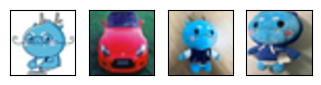

2024-06-19 04:39:17,095 - INFO - 총 4개의 puang 이미지가 분류되었습니다.


In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import logging
import sys
import time
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.lite.python.interpreter import Interpreter
from sklearn.utils import shuffle

# 로그 설정
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# 모델 및 데이터 파일 경로
model_path = r"C:\github\Data\Puang_model\model_unquant.tflite"
npy_file_path = r"C:\github\Data\final_files\p1data.npy"

# TensorFlow Lite 모델 로드
interpreter = Interpreter(model_path)
interpreter.allocate_tensors()

# 입력 및 출력 텐서 정보 가져오기
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# npy 파일 로드
with open(npy_file_path, 'rb') as infile:
    test_images = np.load(infile)
    test_labels = np.load(infile)

yourid = 20224531
test_images, test_labels = shuffle(test_images, test_labels, random_state=yourid)

total_images = len(test_images)
logging.info(f'npy 파일 로드 완료: 총 {total_images}개의 이미지')

# 모델 입력 크기 가져오기
input_shape = input_details[0]['shape'][1:4]

# 이미지 분류 및 puang 이미지 저장
puang_images = []
probabilities = []
start_time = time.time()

for i, image in enumerate(test_images):
    # 이미지 리사이즈
    img = array_to_img(image)
    img = img.resize(input_shape[:2])
    image = img_to_array(img) / 255.0  # 픽셀 값을 [0, 1] 사이로 스케일링
    image = np.expand_dims(image, axis=0)  # 모델 입력에 맞게 차원 확장

    # TensorFlow Lite 모델로 예측
    interpreter.set_tensor(input_details[0]['index'], image)
    interpreter.invoke()
    prediction = interpreter.get_tensor(output_details[0]['index'])[0]

    predicted_class = np.argmax(prediction)

    if predicted_class == 10:  # puang 이미지인 경우
        puang_images.append(image[0])
        probabilities.append(prediction[10])  # puang 확률 저장
    
    # 진행 상황 표시
    percent_complete = (i + 1) / total_images * 100
    elapsed_time = time.time() - start_time
    if (i + 1) % 10 == 0:  # 10개마다 업데이트
        print(f'\r진행 상황: {percent_complete:.2f}% ({i + 1}/{total_images}), 경과 시간: {elapsed_time:.2f}초', end='')
        sys.stdout.flush()

print()  # 진행 상황 표시를 완료한 후 줄 바꿈

# puang 이미지 플롯
if puang_images:
    sorted_indices = np.argsort(probabilities)[::-1]  # 확률 내림차순으로 정렬
    top_indices = sorted_indices[:100]  # 상위 100개 인덱스

    plt.figure(figsize=(10, 10))
    for j, idx in enumerate(top_indices):
        plt.subplot(10, 10, j + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(array_to_img(puang_images[idx]))
    plt.show()
else:
    logging.info('puang으로 분류된 이미지가 없습니다.')

logging.info(f'총 {len(puang_images)}개의 puang 이미지가 분류되었습니다.')


2024-06-19 04:43:19,339 - INFO - npy 파일 로드 완료: 총 10000개의 이미지


진행 상황: 100.00% (10000/10000), 경과 시간: 34.50초


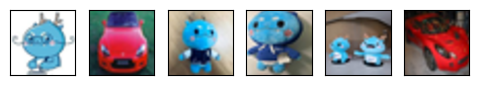

2024-06-19 04:43:54,034 - INFO - 총 6개의 puang 이미지가 분류되었습니다.


In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import logging
import sys
import time
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.lite.python.interpreter import Interpreter
from sklearn.utils import shuffle

# 로그 설정
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# 모델 및 데이터 파일 경로
model_path = r"C:\github\Data\Puang_model\model_unquant.tflite"
npy_file_path = r"C:\github\Data\final_files\p1data.npy"

# TensorFlow Lite 모델 로드
interpreter = Interpreter(model_path)
interpreter.allocate_tensors()

# 입력 및 출력 텐서 정보 가져오기
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# npy 파일 로드
with open(npy_file_path, 'rb') as infile:
    test_images = np.load(infile)
    test_labels = np.load(infile)

yourid = 20224531
test_images, test_labels = shuffle(test_images, test_labels, random_state=yourid)

total_images = len(test_images)
logging.info(f'npy 파일 로드 완료: 총 {total_images}개의 이미지')

# 모델 입력 크기 가져오기
input_shape = input_details[0]['shape'][1:4]

# puang 확률 기준 설정
puang_threshold = 0.2  # 필요에 따라 이 값을 조정

# 이미지 분류 및 puang 이미지 저장
puang_images = []
probabilities = []
start_time = time.time()

for i, image in enumerate(test_images):
    # 이미지 리사이즈
    img = array_to_img(image)
    img = img.resize(input_shape[:2])
    image = img_to_array(img) / 255.0  # 픽셀 값을 [0, 1] 사이로 스케일링
    image = np.expand_dims(image, axis=0)  # 모델 입력에 맞게 차원 확장

    # TensorFlow Lite 모델로 예측
    interpreter.set_tensor(input_details[0]['index'], image)
    interpreter.invoke()
    prediction = interpreter.get_tensor(output_details[0]['index'])[0]

    if prediction[10] >= puang_threshold:  # puang 확률이 기준 이상인 경우
        puang_images.append(image[0])
        probabilities.append(prediction[10])  # puang 확률 저장
    
    # 진행 상황 표시
    percent_complete = (i + 1) / total_images * 100
    elapsed_time = time.time() - start_time
    if (i + 1) % 10 == 0:  # 10개마다 업데이트
        print(f'\r진행 상황: {percent_complete:.2f}% ({i + 1}/{total_images}), 경과 시간: {elapsed_time:.2f}초', end='')
        sys.stdout.flush()

print()  # 진행 상황 표시를 완료한 후 줄 바꿈

# puang 이미지 플롯
if puang_images:
    sorted_indices = np.argsort(probabilities)[::-1]  # 확률 내림차순으로 정렬
    top_indices = sorted_indices[:100]  # 상위 100개 인덱스

    plt.figure(figsize=(10, 10))
    for j, idx in enumerate(top_indices):
        plt.subplot(10, 10, j + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(array_to_img(puang_images[idx]))
    plt.show()
else:
    logging.info('puang으로 분류된 이미지가 없습니다.')

logging.info(f'총 {len(puang_images)}개의 puang 이미지가 분류되었습니다.')


2024-06-19 05:07:27,164 - INFO - npy 파일 로드 완료: 총 10000개의 이미지


진행 상황: 100.00% (10000/10000), 경과 시간: 70.04초


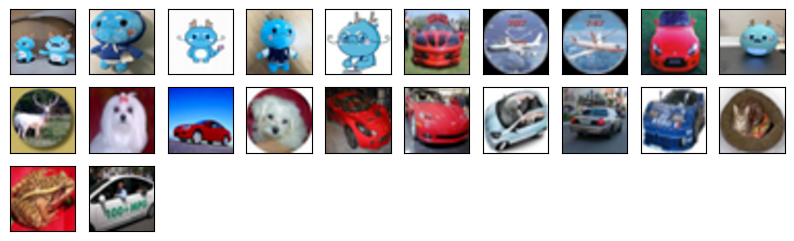

2024-06-19 05:08:39,669 - INFO - 총 22개의 puang 이미지가 분류되었습니다.


In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import logging
import sys
import time
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.lite.python.interpreter import Interpreter
from sklearn.utils import shuffle

# 로그 설정
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# 모델 및 데이터 파일 경로
model_path = r"C:\github\Data\Puang_modelV2\model_unquant.tflite"
npy_file_path = r"C:\github\Data\final_files\p1data.npy"

# TensorFlow Lite 모델 로드
interpreter = Interpreter(model_path)
interpreter.allocate_tensors()

# 입력 및 출력 텐서 정보 가져오기
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# npy 파일 로드
with open(npy_file_path, 'rb') as infile:
    test_images = np.load(infile)
    test_labels = np.load(infile)

yourid = 20224531
test_images, test_labels = shuffle(test_images, test_labels, random_state=yourid)

total_images = len(test_images)
logging.info(f'npy 파일 로드 완료: 총 {total_images}개의 이미지')

# 모델 입력 크기 가져오기
input_shape = input_details[0]['shape'][1:4]

# puang 확률 기준 설정
puang_threshold = 0.3  # 필요에 따라 이 값을 조정

# 이미지 분류 및 puang 이미지 저장
puang_images = []
probabilities = []
start_time = time.time()

for i, image in enumerate(test_images):
    # 이미지 리사이즈
    img = array_to_img(image)
    img = img.resize(input_shape[:2])
    image = img_to_array(img) / 255.0  # 픽셀 값을 [0, 1] 사이로 스케일링
    image = np.expand_dims(image, axis=0)  # 모델 입력에 맞게 차원 확장

    # TensorFlow Lite 모델로 예측
    interpreter.set_tensor(input_details[0]['index'], image)
    interpreter.invoke()
    prediction = interpreter.get_tensor(output_details[0]['index'])[0]

    if prediction[10] >= puang_threshold:  # puang 확률이 기준 이상인 경우
        puang_images.append(image[0])
        probabilities.append(prediction[10])  # puang 확률 저장
    
    # 진행 상황 표시
    percent_complete = (i + 1) / total_images * 100
    elapsed_time = time.time() - start_time
    if (i + 1) % 10 == 0:  # 10개마다 업데이트
        print(f'\r진행 상황: {percent_complete:.2f}% ({i + 1}/{total_images}), 경과 시간: {elapsed_time:.2f}초', end='')
        sys.stdout.flush()

print()  # 진행 상황 표시를 완료한 후 줄 바꿈

# puang 이미지 플롯
if puang_images:
    sorted_indices = np.argsort(probabilities)[::-1]  # 확률 내림차순으로 정렬
    top_indices = sorted_indices[:100]  # 상위 100개 인덱스

    plt.figure(figsize=(10, 10))
    for j, idx in enumerate(top_indices):
        plt.subplot(10, 10, j + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(array_to_img(puang_images[idx]))
    plt.show()
else:
    logging.info('puang으로 분류된 이미지가 없습니다.')

logging.info(f'총 {len(puang_images)}개의 puang 이미지가 분류되었습니다.')


2024-06-19 05:23:01,119 - INFO - npy 파일 로드 완료: 총 10000개의 이미지


진행 상황: 100.00% (10000/10000), 경과 시간: 37.71초


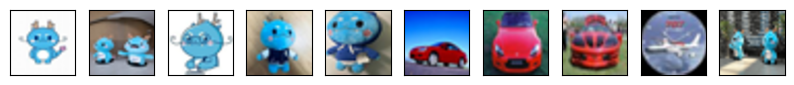

2024-06-19 05:23:39,240 - INFO - 총 10개의 puang 이미지가 분류되었습니다.


In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import logging
import sys
import time
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.lite.python.interpreter import Interpreter
from sklearn.utils import shuffle

# 로그 설정
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# 모델 및 데이터 파일 경로
model_path = r"C:\github\Data\Puang_modelV3\model_unquant.tflite"
npy_file_path = r"C:\github\Data\final_files\p1data.npy"

# TensorFlow Lite 모델 로드
interpreter = Interpreter(model_path)
interpreter.allocate_tensors()

# 입력 및 출력 텐서 정보 가져오기
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# npy 파일 로드
with open(npy_file_path, 'rb') as infile:
    test_images = np.load(infile)
    test_labels = np.load(infile)

yourid = 20224531
test_images, test_labels = shuffle(test_images, test_labels, random_state=yourid)

total_images = len(test_images)
logging.info(f'npy 파일 로드 완료: 총 {total_images}개의 이미지')

# 모델 입력 크기 가져오기
input_shape = input_details[0]['shape'][1:4]

# puang 확률 기준 설정
puang_threshold = 0.8  # 필요에 따라 이 값을 조정

# 이미지 분류 및 puang 이미지 저장
puang_images = []
probabilities = []
start_time = time.time()

for i, image in enumerate(test_images):
    # 이미지 리사이즈
    img = array_to_img(image)
    img = img.resize(input_shape[:2])
    image = img_to_array(img) / 255.0  # 픽셀 값을 [0, 1] 사이로 스케일링
    image = np.expand_dims(image, axis=0)  # 모델 입력에 맞게 차원 확장

    # TensorFlow Lite 모델로 예측
    interpreter.set_tensor(input_details[0]['index'], image)
    interpreter.invoke()
    prediction = interpreter.get_tensor(output_details[0]['index'])[0]

    if prediction[10] >= puang_threshold:  # puang 확률이 기준 이상인 경우
        puang_images.append(image[0])
        probabilities.append(prediction[10])  # puang 확률 저장
    
    # 진행 상황 표시
    percent_complete = (i + 1) / total_images * 100
    elapsed_time = time.time() - start_time
    if (i + 1) % 10 == 0:  # 10개마다 업데이트
        print(f'\r진행 상황: {percent_complete:.2f}% ({i + 1}/{total_images}), 경과 시간: {elapsed_time:.2f}초', end='')
        sys.stdout.flush()

print()  # 진행 상황 표시를 완료한 후 줄 바꿈

# puang 이미지 플롯
if puang_images:
    sorted_indices = np.argsort(probabilities)[::-1]  # 확률 내림차순으로 정렬
    top_indices = sorted_indices[:100]  # 상위 100개 인덱스

    plt.figure(figsize=(10, 10))
    for j, idx in enumerate(top_indices):
        plt.subplot(10, 10, j + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(array_to_img(puang_images[idx]))
    plt.show()
else:
    logging.info('puang으로 분류된 이미지가 없습니다.')

logging.info(f'총 {len(puang_images)}개의 puang 이미지가 분류되었습니다.')


2024-06-19 05:34:42,025 - INFO - npy 파일 로드 완료: 총 10000개의 이미지


진행 상황: 100.00% (10000/10000), 경과 시간: 66.36초


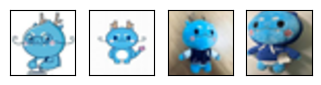

2024-06-19 05:35:48,674 - INFO - 총 4개의 puang 이미지가 분류되었습니다.


In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import logging
import sys
import time
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.lite.python.interpreter import Interpreter
from sklearn.utils import shuffle

# 로그 설정
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# 모델 및 데이터 파일 경로
model_path = r"C:\github\Data\Puang_modelV4\model_unquant.tflite"
npy_file_path = r"C:\github\Data\final_files\p1data.npy"

# TensorFlow Lite 모델 로드
interpreter = Interpreter(model_path)
interpreter.allocate_tensors()

# 입력 및 출력 텐서 정보 가져오기
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# npy 파일 로드
with open(npy_file_path, 'rb') as infile:
    test_images = np.load(infile)
    test_labels = np.load(infile)

yourid = 20224531
test_images, test_labels = shuffle(test_images, test_labels, random_state=yourid)

total_images = len(test_images)
logging.info(f'npy 파일 로드 완료: 총 {total_images}개의 이미지')

# 모델 입력 크기 가져오기
input_shape = input_details[0]['shape'][1:4]

# puang 확률 기준 설정
puang_threshold = 0.9  # 필요에 따라 이 값을 조정

# 이미지 분류 및 puang 이미지 저장
puang_images = []
probabilities = []
start_time = time.time()

for i, image in enumerate(test_images):
    # 이미지 리사이즈
    img = array_to_img(image)
    img = img.resize(input_shape[:2])
    image = img_to_array(img) / 255.0  # 픽셀 값을 [0, 1] 사이로 스케일링
    image = np.expand_dims(image, axis=0)  # 모델 입력에 맞게 차원 확장

    # TensorFlow Lite 모델로 예측
    interpreter.set_tensor(input_details[0]['index'], image)
    interpreter.invoke()
    prediction = interpreter.get_tensor(output_details[0]['index'])[0]

    if prediction[10] >= puang_threshold:  # puang 확률이 기준 이상인 경우
        puang_images.append(image[0])
        probabilities.append(prediction[10])  # puang 확률 저장
    
    # 진행 상황 표시
    percent_complete = (i + 1) / total_images * 100
    elapsed_time = time.time() - start_time
    if (i + 1) % 10 == 0:  # 10개마다 업데이트
        print(f'\r진행 상황: {percent_complete:.2f}% ({i + 1}/{total_images}), 경과 시간: {elapsed_time:.2f}초', end='')
        sys.stdout.flush()

print()  # 진행 상황 표시를 완료한 후 줄 바꿈

# puang 이미지 플롯
if puang_images:
    sorted_indices = np.argsort(probabilities)[::-1]  # 확률 내림차순으로 정렬
    top_indices = sorted_indices[:100]  # 상위 100개 인덱스

    plt.figure(figsize=(10, 10))
    for j, idx in enumerate(top_indices):
        plt.subplot(10, 10, j + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(array_to_img(puang_images[idx]))
    plt.show()
else:
    logging.info('puang으로 분류된 이미지가 없습니다.')

logging.info(f'총 {len(puang_images)}개의 puang 이미지가 분류되었습니다.')


2024-06-19 05:45:53,041 - INFO - npy 파일 로드 완료: 총 10000개의 이미지


진행 상황: 100.00% (10000/10000), 경과 시간: 29.74초


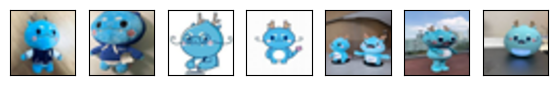

2024-06-19 05:46:22,951 - INFO - 총 7개의 puang 이미지가 분류되었습니다.


In [32]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import logging
import sys
import time
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.lite.python.interpreter import Interpreter
from sklearn.utils import shuffle

# 로그 설정
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# 모델 및 데이터 파일 경로
model_path = r"C:\github\Data\Puang_modelV5\model_unquant.tflite"
npy_file_path = r"C:\github\Data\final_files\p1data.npy"

# TensorFlow Lite 모델 로드
interpreter = Interpreter(model_path)
interpreter.allocate_tensors()

# 입력 및 출력 텐서 정보 가져오기
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# npy 파일 로드
with open(npy_file_path, 'rb') as infile:
    test_images = np.load(infile)
    test_labels = np.load(infile)

yourid = 20224531
test_images, test_labels = shuffle(test_images, test_labels, random_state=yourid)

total_images = len(test_images)
logging.info(f'npy 파일 로드 완료: 총 {total_images}개의 이미지')

# 모델 입력 크기 가져오기
input_shape = input_details[0]['shape'][1:4]

# puang 확률 기준 설정
puang_threshold = 0.3  # 필요에 따라 이 값을 조정

# 이미지 분류 및 puang 이미지 저장
puang_images = []
probabilities = []
start_time = time.time()

for i, image in enumerate(test_images):
    # 이미지 리사이즈
    img = array_to_img(image)
    img = img.resize(input_shape[:2])
    image = img_to_array(img) / 255.0  # 픽셀 값을 [0, 1] 사이로 스케일링
    image = np.expand_dims(image, axis=0)  # 모델 입력에 맞게 차원 확장

    # TensorFlow Lite 모델로 예측
    interpreter.set_tensor(input_details[0]['index'], image)
    interpreter.invoke()
    prediction = interpreter.get_tensor(output_details[0]['index'])[0]

    if prediction[10] >= puang_threshold:  # puang 확률이 기준 이상인 경우
        puang_images.append(image[0])
        probabilities.append(prediction[10])  # puang 확률 저장
    
    # 진행 상황 표시
    percent_complete = (i + 1) / total_images * 100
    elapsed_time = time.time() - start_time
    if (i + 1) % 10 == 0:  # 10개마다 업데이트
        print(f'\r진행 상황: {percent_complete:.2f}% ({i + 1}/{total_images}), 경과 시간: {elapsed_time:.2f}초', end='')
        sys.stdout.flush()

print()  # 진행 상황 표시를 완료한 후 줄 바꿈

# puang 이미지 플롯
if puang_images:
    sorted_indices = np.argsort(probabilities)[::-1]  # 확률 내림차순으로 정렬
    top_indices = sorted_indices[:100]  # 상위 100개 인덱스

    plt.figure(figsize=(10, 10))
    for j, idx in enumerate(top_indices):
        plt.subplot(10, 10, j + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(array_to_img(puang_images[idx]))
    plt.show()
else:
    logging.info('puang으로 분류된 이미지가 없습니다.')

logging.info(f'총 {len(puang_images)}개의 puang 이미지가 분류되었습니다.')


2024-06-19 06:26:19,499 - INFO - npy 파일 로드 완료: 총 10000개의 이미지


진행 상황: 0.10% (10/10000), 경과 시간: 0.07초

진행 상황: 100.00% (10000/10000), 경과 시간: 39.50초


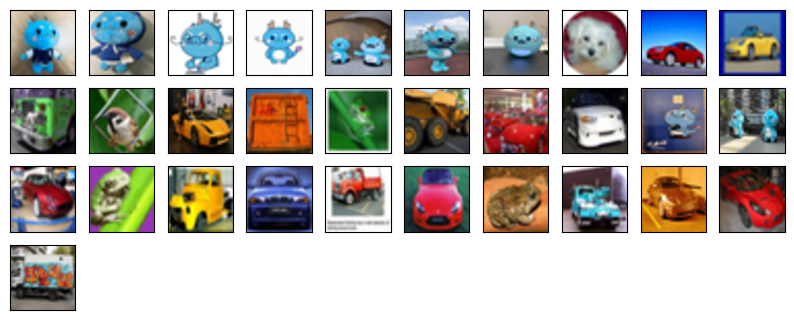

2024-06-19 06:27:00,203 - INFO - 총 31개의 puang 이미지가 분류되었습니다.


In [37]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import logging
import sys
import time
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.lite.python.interpreter import Interpreter
from sklearn.utils import shuffle

# 로그 설정
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# 모델 및 데이터 파일 경로
model_path = r"C:\github\Data\Puang_modelV5\model_unquant.tflite"
npy_file_path = r"C:\github\Data\final_files\p1data.npy"

# TensorFlow Lite 모델 로드
interpreter = Interpreter(model_path)
interpreter.allocate_tensors()

# 입력 및 출력 텐서 정보 가져오기
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# npy 파일 로드
with open(npy_file_path, 'rb') as infile:
    test_images = np.load(infile)
    test_labels = np.load(infile)

yourid = 20224531
test_images, test_labels = shuffle(test_images, test_labels, random_state=yourid)

total_images = len(test_images)
logging.info(f'npy 파일 로드 완료: 총 {total_images}개의 이미지')

# 모델 입력 크기 가져오기
input_shape = input_details[0]['shape'][1:4]

# puang 확률 기준 설정
puang_threshold = 0.05  # 필요에 따라 이 값을 조정

# 이미지 분류 및 puang 이미지 저장
puang_images = []
probabilities = []
start_time = time.time()

for i, image in enumerate(test_images):
    # 이미지 리사이즈
    img = array_to_img(image)
    img = img.resize(input_shape[:2])
    image = img_to_array(img) / 255.0  # 픽셀 값을 [0, 1] 사이로 스케일링
    image = np.expand_dims(image, axis=0)  # 모델 입력에 맞게 차원 확장

    # TensorFlow Lite 모델로 예측
    interpreter.set_tensor(input_details[0]['index'], image)
    interpreter.invoke()
    prediction = interpreter.get_tensor(output_details[0]['index'])[0]

    if prediction[10] >= puang_threshold:  # puang 확률이 기준 이상인 경우
        puang_images.append(image[0])
        probabilities.append(prediction[10])  # puang 확률 저장
    
    # 진행 상황 표시
    percent_complete = (i + 1) / total_images * 100
    elapsed_time = time.time() - start_time
    if (i + 1) % 10 == 0:  # 10개마다 업데이트
        print(f'\r진행 상황: {percent_complete:.2f}% ({i + 1}/{total_images}), 경과 시간: {elapsed_time:.2f}초', end='')
        sys.stdout.flush()

print()  # 진행 상황 표시를 완료한 후 줄 바꿈

# puang 이미지 플롯
if puang_images:
    sorted_indices = np.argsort(probabilities)[::-1]  # 확률 내림차순으로 정렬
    top_indices = sorted_indices[:100]  # 상위 100개 인덱스

    plt.figure(figsize=(10, 10))
    for j, idx in enumerate(top_indices):
        plt.subplot(10, 10, j + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(array_to_img(puang_images[idx]))
    plt.show()
else:
    logging.info('puang으로 분류된 이미지가 없습니다.')

logging.info(f'총 {len(puang_images)}개의 puang 이미지가 분류되었습니다.')


2024-06-19 06:22:34,951 - INFO - npy 파일 로드 완료: 총 10000개의 이미지


진행 상황: 100.00% (10000/10000), 경과 시간: 32.03초


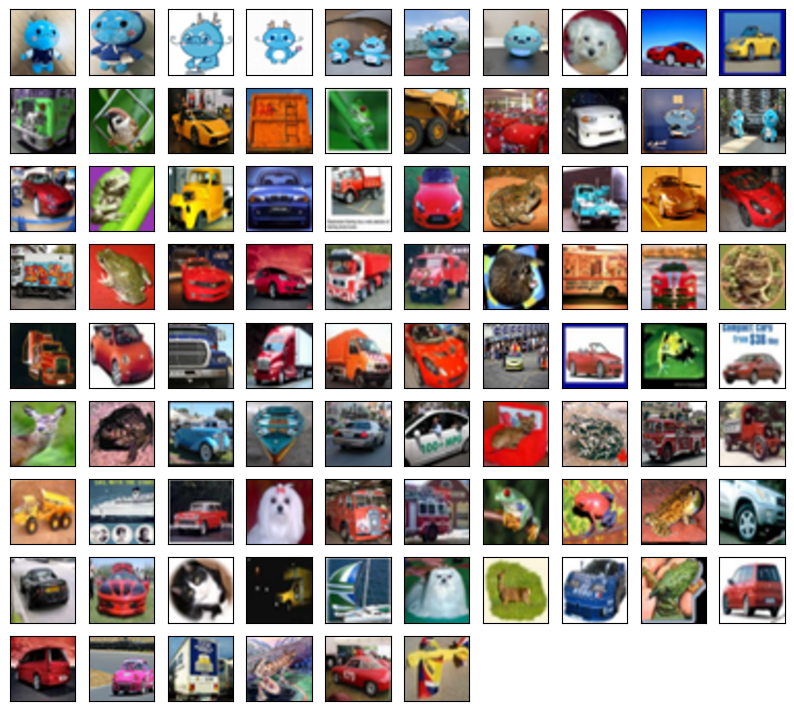

2024-06-19 06:23:09,285 - INFO - 총 86개의 puang 이미지가 분류되었습니다.


In [36]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import logging
import sys
import time
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.lite.python.interpreter import Interpreter
from sklearn.utils import shuffle
import cv2

# 로그 설정
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# 모델 및 데이터 파일 경로
model_path = r"C:\github\Data\Puang_modelV5\model_unquant.tflite"
npy_file_path = r"C:\github\Data\final_files\p1data.npy"

# TensorFlow Lite 모델 로드
interpreter = Interpreter(model_path)
interpreter.allocate_tensors()

# 입력 및 출력 텐서 정보 가져오기
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# npy 파일 로드
with open(npy_file_path, 'rb') as infile:
    test_images = np.load(infile)
    test_labels = np.load(infile)

yourid = 20224531
test_images, test_labels = shuffle(test_images, test_labels, random_state=yourid)

total_images = len(test_images)
logging.info(f'npy 파일 로드 완료: 총 {total_images}개의 이미지')

# 모델 입력 크기 가져오기
input_shape = input_details[0]['shape'][1:4]

# puang 확률 기준 설정
puang_threshold = 0.01  # 필요에 따라 이 값을 조정

# 빨간색 존재 여부를 판단하는 함수 (OpenCV 사용)
def contains_red(image, threshold=0.8):
    image = (image * 255).astype(np.uint8)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    lower_red1 = np.array([0, 100, 100])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([160, 100, 100])
    upper_red2 = np.array([179, 255, 255])
    mask1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
    mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
    red_mask = mask1 | mask2
    red_pixels = np.sum(red_mask > 0)
    total_pixels = image.shape[0] * image.shape[1]
    red_ratio = red_pixels / total_pixels
    return red_ratio > threshold

# 이미지 분류 및 puang 이미지 저장
puang_images = []
probabilities = []
start_time = time.time()

for i, image in enumerate(test_images):
    # 이미지 리사이즈
    img = array_to_img(image)
    img = img.resize(input_shape[:2])
    image = img_to_array(img) / 255.0  # 픽셀 값을 [0, 1] 사이로 스케일링
    image = np.expand_dims(image, axis=0)  # 모델 입력에 맞게 차원 확장

    # TensorFlow Lite 모델로 예측
    interpreter.set_tensor(input_details[0]['index'], image)
    interpreter.invoke()
    prediction = interpreter.get_tensor(output_details[0]['index'])[0]

    if prediction[10] >= puang_threshold and not contains_red(image[0]):  # puang 확률이 기준 이상이면서 빨간색이 없는 경우
        puang_images.append(image[0])
        probabilities.append(prediction[10])  # puang 확률 저장
    
    # 진행 상황 표시
    percent_complete = (i + 1) / total_images * 100
    elapsed_time = time.time() - start_time
    if (i + 1) % 10 == 0:  # 10개마다 업데이트
        print(f'\r진행 상황: {percent_complete:.2f}% ({i + 1}/{total_images}), 경과 시간: {elapsed_time:.2f}초', end='')
        sys.stdout.flush()

print()  # 진행 상황 표시를 완료한 후 줄 바꿈

# puang 이미지 플롯
if puang_images:
    sorted_indices = np.argsort(probabilities)[::-1]  # 확률 내림차순으로 정렬
    top_indices = sorted_indices[:100]  # 상위 100개 인덱스

    plt.figure(figsize=(10, 10))
    for j, idx in enumerate(top_indices):
        plt.subplot(10, 10, j + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(array_to_img(puang_images[idx]))
    plt.show()
else:
    logging.info('puang으로 분류된 이미지가 없습니다.')

logging.info(f'총 {len(puang_images)}개의 puang 이미지가 분류되었습니다.')
